# Classify 10 nearest neighbours Images From Model

Import modules

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Set the parameters for the KNN identifier

In [2]:
path_to_network = '../Transfer Learning InceptionV3/InceptionV3_1552057058_state_of_the_art.h5'
selected_layer = 'mixed10'
training_data_dir = r'C:\Users\snirm\Devl\ML\Final-Project\Sessions\Test Session 6\Train'

Load data trained model and create equal model until the selected layer as flastten layer   

In [3]:
base_model = load_model(path_to_network)

x=base_model.get_layer(selected_layer).output
vector=Flatten()(x)

model = Model(inputs=base_model.input, outputs=vector)

datagen = ImageDataGenerator()
generator = datagen.flow_from_directory(
        training_data_dir,
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 35416 images belonging to 100 classes.


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 63, 63, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 63, 63, 32)   0           batch_normalization_188[0][0]    
__________________________________________________________________________________________________
conv2d_189

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
import numpy as np

imgsList = []
procImgs = []
labels = []
for i in range(generator.n):
    (img, lbl) = generator.next();
    imgsList.append(img)            # Adding the original image to the list
    procImgs.append(np.reshape(model.predict_on_batch(img), -1)) # Using our model to give the images labels
    labels.append(np.argmax(lbl)) # Saving the label with  the highest prediction for each image.

C:\Users\snirm\Anaconda3\envs\py36\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(procImgs, labels)

[0.        0.        0.        ... 0.3190321 1.2214946 0.       ]


In [77]:
test_datagen = ImageDataGenerator()
test_data_dir = r'C:\Users\snirm\Devl\ML\Final-Project\Sessions\Test Session 6\Test'

test_generator = test_datagen.flow_from_directory(
                                        test_data_dir,
                                         target_size=(128, 128),
                                         batch_size=1,
                                         color_mode='rgb',
                                        class_mode = "categorical",
                                        shuffle=True)

x_img, y_label = next(test_generator);
features = model.predict(x_img) # numpy array of probability for each img

Found 1 images belonging to 1 classes.


In [94]:
print (features.shape)

(1, 8192)


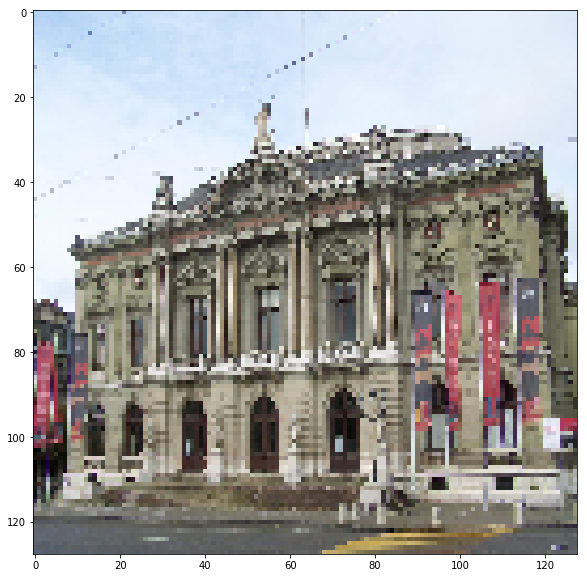

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(1,1,1)
image = x_img
image= image.astype(int)
image = np.reshape(image, (128, 128, 3))
plt.imshow(image)

In [80]:
labels = neigh.kneighbors(features, return_distance=False) 

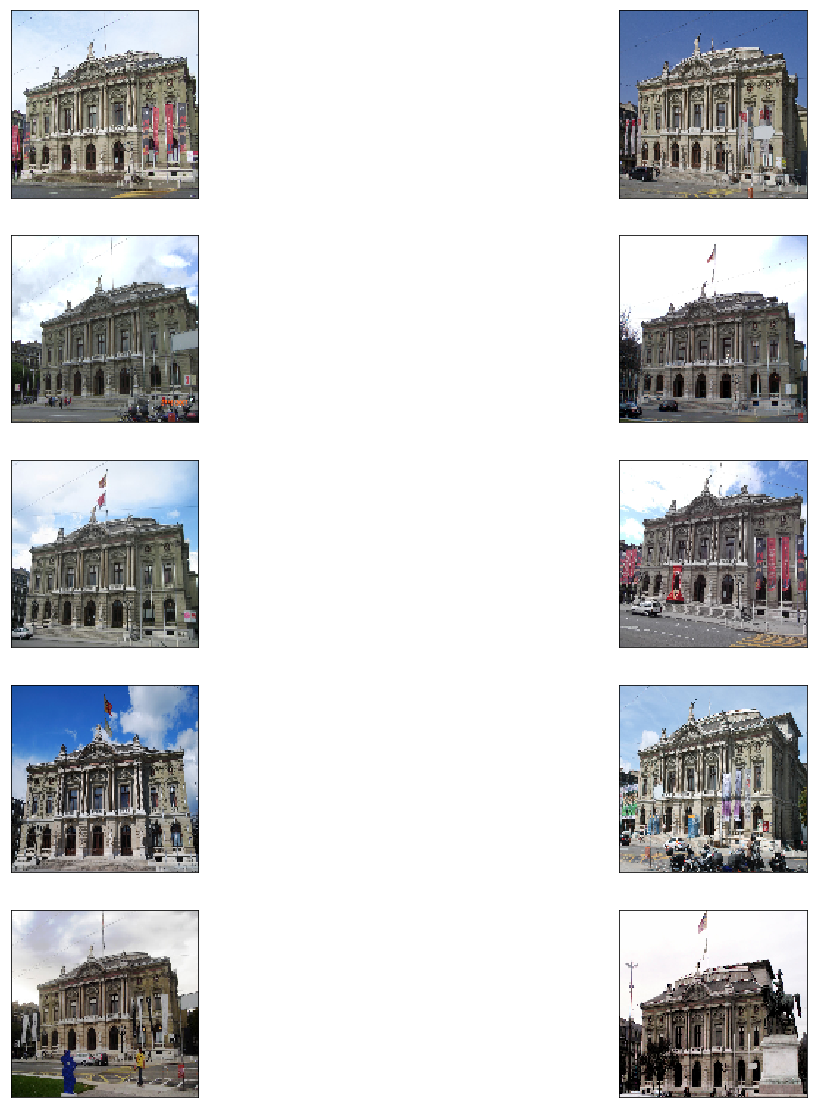

In [81]:
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = imgsList[labels[0][i]]
    image= image.astype(int)
    image = np.reshape(image, (128, 128, 3))
    plt.imshow(image)